In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:

pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt 
from matplotlib_venn import venn3, venn2
import seaborn as sns

### Data preparation

In [4]:
pwd

'C:\\Users\\komalsingh\\Downloads'

In [5]:
df_raw = pd.read_csv('C:\\Users\\komalsingh\\Downloads\survey lung cancer.csv')
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
GENDER                   309 non-null object
AGE                      309 non-null int64
SMOKING                  309 non-null int64
YELLOW_FINGERS           309 non-null int64
ANXIETY                  309 non-null int64
PEER_PRESSURE            309 non-null int64
CHRONIC DISEASE          309 non-null int64
FATIGUE                  309 non-null int64
ALLERGY                  309 non-null int64
WHEEZING                 309 non-null int64
ALCOHOL CONSUMING        309 non-null int64
COUGHING                 309 non-null int64
SHORTNESS OF BREATH      309 non-null int64
SWALLOWING DIFFICULTY    309 non-null int64
CHEST PAIN               309 non-null int64
LUNG_CANCER              309 non-null object
dtypes: int64(14), object(2)
memory usage: 38.7+ KB


In [6]:
#Duplicate Checking

print(f'Total Duplicated Rows : {df.duplicated().sum()}')

Total Duplicated Rows : 33


In [7]:
#Remove Duplicated Rows

df = df[~df.duplicated()]
print(f'Total Duplicated Rows : {df.duplicated().sum()}')

Total Duplicated Rows : 0


In [8]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [9]:
#Changing Value for Gender Column Male : 1, Female : 0

df['GENDER'] = df['GENDER'].replace({'M' : 1, 'F' : 0})
df['GENDER'].value_counts()

1    142
0    134
Name: GENDER, dtype: int64

In [10]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [11]:
df['PATIENT_ID'] = np.arange(1, df.shape[0] + 1)

In [12]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,PATIENT_ID
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,3
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,4
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,5


### Data visualisation

In [13]:
smoking = df[(df['SMOKING'] == 2)]
no_smoking = df[(df['SMOKING'] == 1)]

alcohol = df[(df['ALCOHOL CONSUMING'] == 2)]
no_alcohol = df[(df['ALCOHOL CONSUMING'] == 1)]

cancer = df[(df['LUNG_CANCER'] == 'YES')]
no_cancer = df[(df['LUNG_CANCER'] == 'NO')]

In [14]:
set_smoking = set(smoking['PATIENT_ID'])
set_nosmoking = set(no_smoking['PATIENT_ID'])

set_alcohol = set(alcohol['PATIENT_ID'])
set_noalcohol = set(no_alcohol['PATIENT_ID'])

set_cancer = set(cancer['PATIENT_ID'])
set_nocancer = set(no_cancer['PATIENT_ID'])

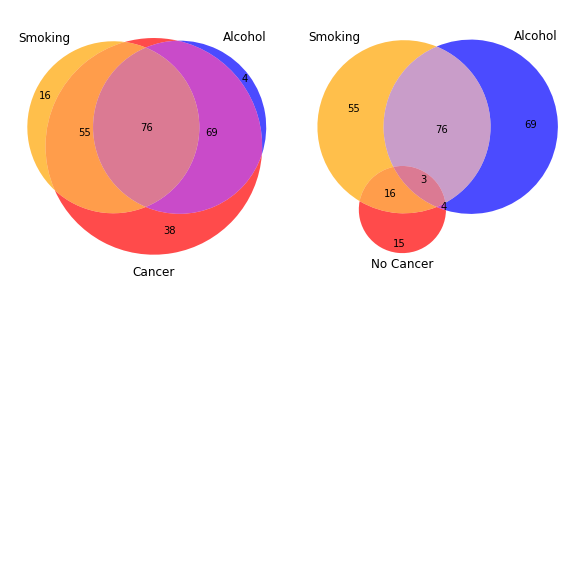

In [15]:
plt.figure(figsize=(8,8), constrained_layout = True)

plt.subplot(2,2,1)
venn3([set_smoking, set_alcohol, set_cancer], ('Smoking', 'Alcohol', 'Cancer'),
     set_colors=("orange", "blue", "red"), alpha=0.7)

plt.subplot(2,2,2)
venn3([set_smoking, set_alcohol, set_nocancer], ('Smoking', 'Alcohol', 'No Cancer'),
     set_colors=("orange", "blue", "red"), alpha=0.7)



Take aways:
* It is significantly more likely to get lung cancer if one BOTH smokes and consumes alcohol (3 vs 76)
* It is significantly more likely to get lung cancer if one EITHER smokes OR consumes alcohol (16 vs 55 and 4 vs 69)
* There is a substantial possibility that one may still get lung cancer without smoking or consuming alcohol (38 cases).

### Lung cancer symptoms investigation

In [16]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'PATIENT_ID'],
      dtype='object')

In [17]:
symptoms = ['SHORTNESS OF BREATH', 'FATIGUE ', 'COUGHING', 'WHEEZING', 'CHEST PAIN', 
            'ALLERGY ',  'SWALLOWING DIFFICULTY','YELLOW_FINGERS']

In [18]:
df_symptoms = df_raw[np.append(symptoms,'LUNG_CANCER')].copy()

In [19]:
key = {2 : 'YES', 1 : 'NO'}

df_symptoms = df_symptoms[np.append(symptoms,'LUNG_CANCER')].replace(key)

In [20]:
df_symptoms.head(5)

,SHORTNESS OF BREATH,FATIGUE,COUGHING,WHEEZING,CHEST PAIN,ALLERGY,SWALLOWING DIFFICULTY,YELLOW_FINGERS,LUNG_CANCER
0,YES,YES,YES,YES,YES,NO,YES,YES,YES
1,YES,YES,NO,NO,YES,YES,YES,NO,YES
2,YES,YES,YES,YES,YES,NO,NO,NO,NO
3,NO,NO,NO,NO,YES,NO,YES,YES,NO
4,YES,NO,YES,YES,NO,NO,NO,YES,NO


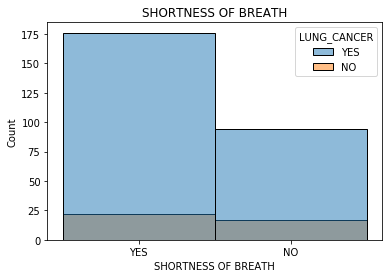

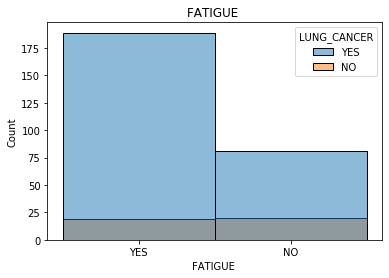

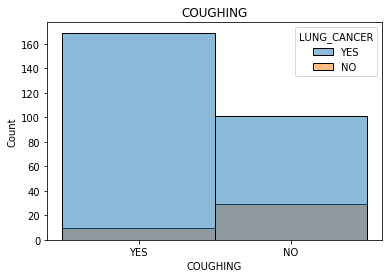

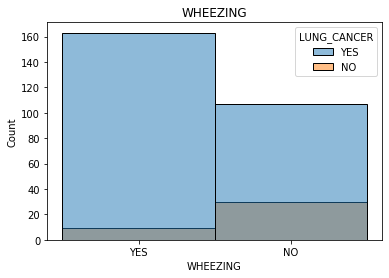

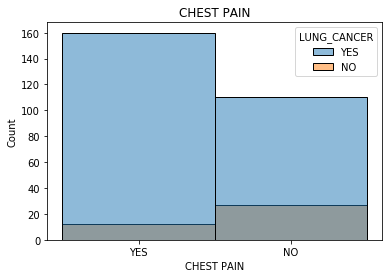

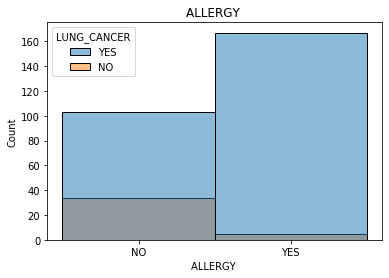

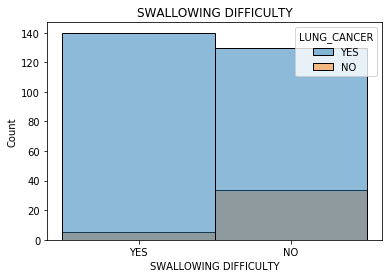

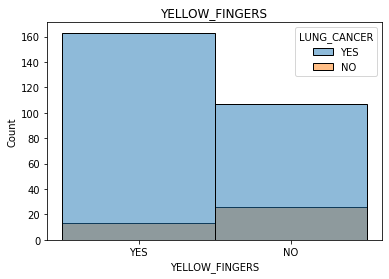

In [21]:
# Checking value counts for different symptoms
for a in symptoms:
    sns.histplot(df_symptoms[[a, 'LUNG_CANCER']], x = a, hue="LUNG_CANCER")
    plt.title(a)
    plt.show()

Take aways:
* Choughing, wheezing, chest pain, allergy, and yellow fingers seem to occur more in presence of lung cancer, and less in absence of it. Therfore, these symptoms can be considered to act as reliable indicators of presence of lung cancer.
* Fatigue and shortness of breath, though are equally likely to occur in absence of lung cancer, are about twice more likely to occur in presence of lung cancer. These two, therefore can be considered the additional indicators of lung cancer.
* Although, swallowing difficulty is less likely to occur in absence of lung cancer, it is equally likely to occur in presence of lung cancer. Therefore, swallowing difficulty can not be considered a reliable indicator of lung cancer.


#### Comorbidity investigation

In [23]:
comorbidity = ['ANXIETY', 'CHRONIC DISEASE']

In [24]:
df_comorbidity = df_raw[np.append(comorbidity,'LUNG_CANCER')]

In [25]:
key = {2 : 'YES', 1 : 'NO'}

df_comorbidity = df_comorbidity[np.append(comorbidity,'LUNG_CANCER')].replace(key)

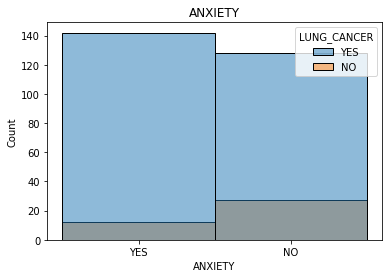

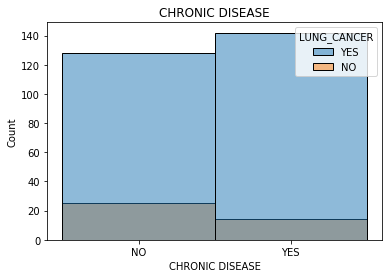

In [26]:
# Checking value counts for each comorbidities
for a in comorbidity:
    sns.histplot(df_comorbidity[[a, 'LUNG_CANCER']], x = a, hue="LUNG_CANCER")
    plt.title(a)
    plt.show()

Take aways:
* The presence of anxiety and chronic disease seems to be slightly positively correlated with the presence of lung cancer.
* Since chronic disease is a physiological comorbidity, it may be considered as secondary symptom to predict lung cancer

##### Preprocessing

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
cause_symptom = ['SMOKING', 'ALCOHOL CONSUMING',
                 'SHORTNESS OF BREATH', 'FATIGUE ', 'COUGHING', 'WHEEZING',
                 'CHEST PAIN', 'ALLERGY ', 'YELLOW_FINGERS', 'CHRONIC DISEASE',
                 'LUNG_CANCER',]
df_cause_symptom = df_raw[cause_symptom].copy()

In [29]:
df_cause_symptom.head(5)

,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,FATIGUE,COUGHING,WHEEZING,CHEST PAIN,ALLERGY,YELLOW_FINGERS,CHRONIC DISEASE,LUNG_CANCER
0,1,2,2,2,2,2,2,1,2,1,YES
1,2,1,2,2,1,1,2,2,1,2,YES
2,1,1,2,2,2,2,2,1,1,1,NO
3,2,2,1,1,1,1,2,1,2,1,NO
4,1,1,2,1,2,2,1,1,2,1,NO


In [30]:
print ('Total Cancer positive Patients : {} '.format(df_cause_symptom['LUNG_CANCER'].value_counts()['YES']))
print ('Total Cancer negative Patients : {} '.format(df_cause_symptom['LUNG_CANCER'].value_counts()['NO']))

Total Cancer positive Patients : 270 
Total Cancer negative Patients : 39 


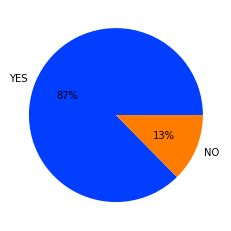

In [31]:
values = df_cause_symptom['LUNG_CANCER'].value_counts().tolist()
names = list(dict(df_cause_symptom['LUNG_CANCER'].value_counts()).keys())

colors = sns.color_palette('bright')
plt.figure()
plt.pie(values, labels=names,colors = colors, autopct = '%0.0f%%')
plt.show()

* The data is imbalanced: There are way more cancer-positive patients than cancer-negative patients. Therfore, before trying to develop a model, the dataset needs to be balanced.

In [32]:
key_rev = {'YES' : 2, 'NO' : 1}

df_cause_symptom = df_cause_symptom.replace(key_rev)
df_cause_symptom.head(5)

,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,FATIGUE,COUGHING,WHEEZING,CHEST PAIN,ALLERGY,YELLOW_FINGERS,CHRONIC DISEASE,LUNG_CANCER
0,1,2,2,2,2,2,2,1,2,1,2
1,2,1,2,2,1,1,2,2,1,2,2
2,1,1,2,2,2,2,2,1,1,1,1
3,2,2,1,1,1,1,2,1,2,1,1
4,1,1,2,1,2,2,1,1,2,1,1


In [33]:
X = df_cause_symptom.drop('LUNG_CANCER', axis = 1)
X.head(5)

,SMOKING,ALCOHOL CONSUMING,SHORTNESS OF BREATH,FATIGUE,COUGHING,WHEEZING,CHEST PAIN,ALLERGY,YELLOW_FINGERS,CHRONIC DISEASE
0,1,2,2,2,2,2,2,1,2,1
1,2,1,2,2,1,1,2,2,1,2
2,1,1,2,2,2,2,2,1,1,1
3,2,2,1,1,1,1,2,1,2,1
4,1,1,2,1,2,2,1,1,2,1


In [34]:
y = df_cause_symptom['LUNG_CANCER']
y.head(5)

0    2
1    2
2    1
3    1
4    1
Name: LUNG_CANCER, dtype: int64

#### Balancing data

In [35]:
# Adding randomized samples to the data as the data is imbalanced
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((540, 10), (540,))

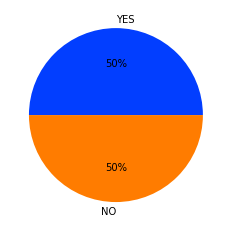

In [36]:
values = y_train_res.value_counts().tolist()
colors = sns.color_palette('bright')
plt.figure()
plt.pie(values, labels=names,colors = colors, autopct = '%0.0f%%')
plt.show()

#### Splitting data into Train and Test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)
len(X_train), len(X_test)

(432, 108)

#### Scale the data

In [38]:
# Scaling the data 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

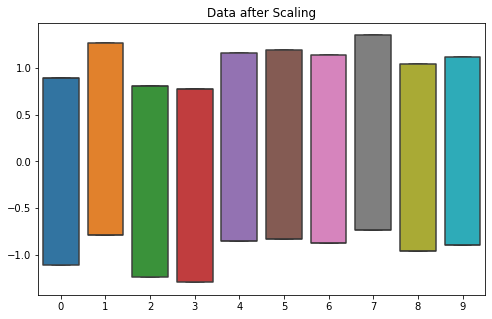

In [39]:
plt.figure(figsize=(8,5))
plt.title("Data after Scaling")
sns.boxenplot(data = X_train)
plt.show()

#### Differnt ML algorithms

#### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
LinearRegressionScore = lr.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 58.36530037464759


#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 95.37037037037037


#### K Neighbours Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 90.74074074074075


#### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 94.44444444444444


#### Gradient Boosting classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 94.44444444444444


#### Comparison

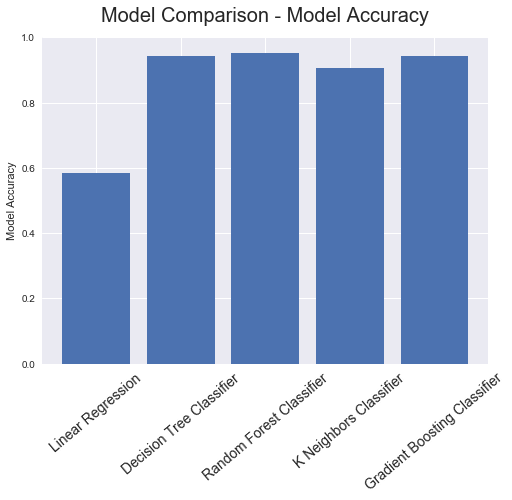

In [60]:
plt.style.use("seaborn")

x = ["Linear Regression", 
     "Decision Tree Classifier", 
     "Random Forest Classifier", 
     "K Neighbors Classifier",  
     "Gradient Boosting Classifier"
    ]

y_ = [LinearRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,  
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(x,y_)
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=20, y=1.03)
plt.ylim([0,1])
plt.show()

Conclusion:
* It seems that Random Forest Classifier seem to perform the best with ~95% accuracy to predict presence of lung cancer on the given data set.